This notebook will 
1. load the csv with "raw" line P data at the sampling depths.
2. For each sample, we do a one-to -one match (assign each sample to the neartest bin) with our 5m bins (avoid duplicates)
3. if there is more than 1 measurement per bin we include both (no averaging)

In [14]:
import pandas as pd
import numpy as np
year0=2008
outpath = '/gpfs/fs7/dfo/hpcmc/pfm/amh001/DATA/OUTPUTS_LINEP/'
df = pd.read_csv(outpath + 'LineP_ctds_'+str(year0)+'.csv')

# Define binning parameters
depth_column = 'CTDPRS_DBAR'
bin_width = 5
max_depth = df[depth_column].max()
min_depth = 0

bin_edges = np.arange(min_depth, max_depth + bin_width, bin_width)
bin_centers = bin_edges[:-1] + bin_width/2

# Assign each measurement to its bin (keep ALL measurements)
df['PRS_bin_cntr'] = pd.cut(df[depth_column], bins=bin_edges, labels=bin_centers, right=False)

print(df.head(20))
print(f"Shape: {df.shape}")
print(f"Measurements per bin distribution:")
print(df.groupby('PRS_bin_cntr').size().describe())

# Save to CSV
df.to_csv(outpath + 'LineP_ctds_'+str(year0)+'_binned.csv', index=False)
print("✓ Saved to CSV")

                   time                            file  CTDPRS_DBAR  \
0   2008-09-02 03:26:56  B7_CastCTD_2008-09-02_0326h.nc          2.4   
1   2008-09-02 03:26:56  B7_CastCTD_2008-09-02_0326h.nc          3.0   
2   2008-09-02 03:26:56  B7_CastCTD_2008-09-02_0326h.nc          4.0   
3   2008-09-02 03:26:56  B7_CastCTD_2008-09-02_0326h.nc          5.0   
4   2008-09-02 03:26:56  B7_CastCTD_2008-09-02_0326h.nc          6.0   
5   2008-09-02 03:26:56  B7_CastCTD_2008-09-02_0326h.nc          7.0   
6   2008-09-02 03:26:56  B7_CastCTD_2008-09-02_0326h.nc          8.0   
7   2008-09-02 03:26:56  B7_CastCTD_2008-09-02_0326h.nc          9.0   
8   2008-09-02 03:26:56  B7_CastCTD_2008-09-02_0326h.nc         10.0   
9   2008-09-02 03:26:56  B7_CastCTD_2008-09-02_0326h.nc         11.0   
10  2008-09-02 03:26:56  B7_CastCTD_2008-09-02_0326h.nc         12.0   
11  2008-09-02 03:26:56  B7_CastCTD_2008-09-02_0326h.nc         13.0   
12  2008-09-02 03:26:56  B7_CastCTD_2008-09-02_0326h.nc         

/tmp/amh001/1130/ipykernel_1328/2780458028.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('PRS_bin_cntr').size().describe())


✓ Saved to CSV


In [18]:
import pandas as pd
import numpy as np
import glob
import os

outpath = '/gpfs/fs7/dfo/hpcmc/pfm/amh001/DATA/OUTPUTS_LINEP/'

# Find all CTD files
ctd_files = sorted(glob.glob(outpath + 'LineP_ctds_*.csv'))
print(f"Found {len(ctd_files)} CTD files:\n")

# Define binning parameters
depth_column = 'CTDPRS_DBAR'
bin_width = 5
bin_edges = np.arange(0, 7000, bin_width)  # Adjust max depth as needed
bin_centers = bin_edges[:-1] + bin_width/2

# Process each file
for file_path in ctd_files:
    filename = os.path.basename(file_path)
    year = filename.split('_')[-1].split('.')[0]  # Extract year from filename
    
    print(f"Processing: {filename}")
    
    # Read file
    df = pd.read_csv(file_path)
    original_count = len(df)
    
    # Assign each measurement to its bin
    df['PRS_bin_cntr'] = pd.cut(df[depth_column], bins=bin_edges, labels=bin_centers, right=False)
    
    # Save binned file
    output_filename = file_path.replace('.csv', '_binned.csv')
    df.to_csv(output_filename, index=False)
    
    # Print statistics
    print(f"  Original rows: {original_count}")
    print(f"  Binned rows: {len(df)}")
    print(f"  Unique casts: {df['file'].nunique()}")
    print(f"  Unique depth bins: {df['PRS_bin_cntr'].nunique()}")
    print(f"  Saved to: {output_filename}\n")

print("✓ All files processed!")

Found 55 CTD files:

Processing: LineP_ctds_1969.csv
  Original rows: 10193
  Binned rows: 10193
  Unique casts: 278
  Unique depth bins: 0
  Saved to: /gpfs/fs7/dfo/hpcmc/pfm/amh001/DATA/OUTPUTS_LINEP/LineP_ctds_1969_binned.csv

Processing: LineP_ctds_1969_binned.csv
  Original rows: 10193
  Binned rows: 10193
  Unique casts: 278
  Unique depth bins: 0
  Saved to: /gpfs/fs7/dfo/hpcmc/pfm/amh001/DATA/OUTPUTS_LINEP/LineP_ctds_1969_binned_binned.csv

Processing: LineP_ctds_1970.csv
  Original rows: 9065
  Binned rows: 9065
  Unique casts: 286
  Unique depth bins: 0
  Saved to: /gpfs/fs7/dfo/hpcmc/pfm/amh001/DATA/OUTPUTS_LINEP/LineP_ctds_1970_binned.csv

Processing: LineP_ctds_1971.csv
  Original rows: 6591
  Binned rows: 6591
  Unique casts: 164
  Unique depth bins: 0
  Saved to: /gpfs/fs7/dfo/hpcmc/pfm/amh001/DATA/OUTPUTS_LINEP/LineP_ctds_1971_binned.csv

Processing: LineP_ctds_1972.csv
  Original rows: 11836
  Binned rows: 11836
  Unique casts: 184
  Unique depth bins: 0
  Saved to: /g

Original shape: (207710, 11)
Binned shape: (207710, 12)

Total casts: 144
First 5 casts: ['B7_CastCTD_2008-09-02_0326h.nc' 'P18_CastCTD_2008-06-06_0706h.nc'
 'P16_CastCTD_2008-06-04_2231h.nc' 'P23_CastCTD_2008-06-07_2347h.nc'
 'P13_CastCTD_2008-02-04_0008h.nc']

Cast 1: B7_CastCTD_2008-09-02_0326h.nc
  Original measurements: 69
  Binned measurements: 69

Cast 2: P18_CastCTD_2008-06-06_0706h.nc
  Original measurements: 1909
  Binned measurements: 1909

Cast 3: P16_CastCTD_2008-06-04_2231h.nc
  Original measurements: 200
  Binned measurements: 200

✓ Saved comparison plot


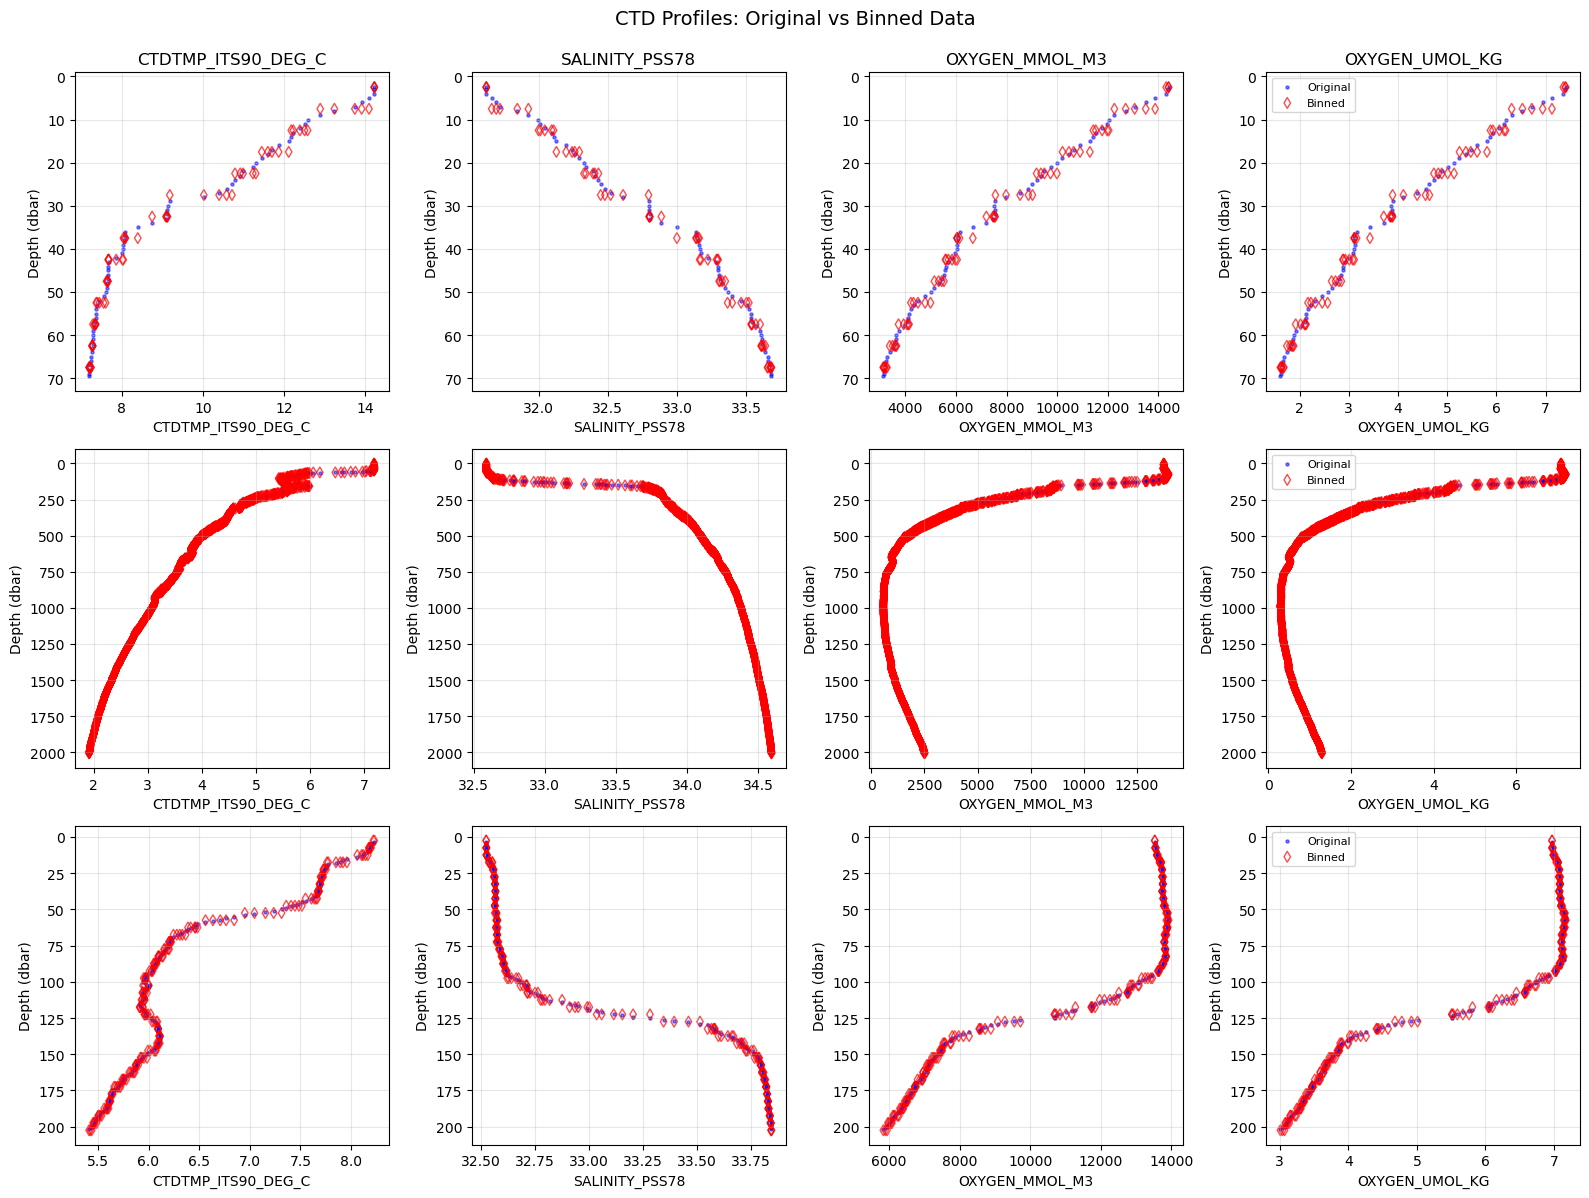


SUMMARY STATISTICS

CTDTMP_ITS90_DEG_C:
  Original - non-null: 207705, NaN: 5
  Binned   - non-null: 207705, NaN: 5

SALINITY_PSS78:
  Original - non-null: 207701, NaN: 9
  Binned   - non-null: 207701, NaN: 9

OXYGEN_MMOL_M3:
  Original - non-null: 207486, NaN: 224
  Binned   - non-null: 207486, NaN: 224

OXYGEN_UMOL_KG:
  Original - non-null: 207496, NaN: 214
  Binned   - non-null: 207496, NaN: 214


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

outpath = '/gpfs/fs7/dfo/hpcmc/pfm/amh001/DATA/OUTPUTS_LINEP/'

# Load both files
df_original = pd.read_csv(outpath + 'LineP_ctds_2008.csv')
df_binned = pd.read_csv(outpath + 'LineP_ctds_2008_binned.csv')

print(f"Original shape: {df_original.shape}")
print(f"Binned shape: {df_binned.shape}")

# Get unique casts
casts = df_original['file'].unique()
print(f"\nTotal casts: {len(casts)}")
print(f"First 5 casts: {casts[:5]}")

# Select a few casts to compare
num_casts_to_plot = 3
selected_casts = casts[:num_casts_to_plot]

# Create figure with subplots
fig, axes = plt.subplots(num_casts_to_plot, 4, figsize=(16, 12))

variables = ['CTDTMP_ITS90_DEG_C', 'SALINITY_PSS78', 'OXYGEN_MMOL_M3', 'OXYGEN_UMOL_KG']
depth_column = 'CTDPRS_DBAR'

for cast_idx, cast_id in enumerate(selected_casts):
    original_cast = df_original[df_original['file'] == cast_id]
    binned_cast = df_binned[df_binned['file'] == cast_id]
    
    print(f"\nCast {cast_idx + 1}: {cast_id}")
    print(f"  Original measurements: {len(original_cast)}")
    print(f"  Binned measurements: {len(binned_cast)}")
    
    for var_idx, var in enumerate(variables):
        ax = axes[cast_idx, var_idx]
        
        # Plot original data
        ax.scatter(original_cast[var], original_cast[depth_column], 
                  alpha=0.5, s=20, label='Original', color='blue', marker='.')
        
        # Plot binned data
        ax.scatter(binned_cast[var], binned_cast['PRS_bin_cntr'], 
                  alpha=0.7, s=30, label='Binned', color='None', marker='d', edgecolor='r')
        
        ax.set_ylabel('Depth (dbar)')
        ax.set_xlabel(var)
        ax.invert_yaxis()
        ax.grid(True, alpha=0.3)
        
        if cast_idx == 0:
            ax.set_title(var)
        if var_idx == 3:
            ax.legend(loc='best', fontsize=8)

plt.suptitle('CTD Profiles: Original vs Binned Data', fontsize=14, y=0.995)
plt.tight_layout()
plt.savefig( 'Figures/profile_comparison_original_vs_binned.png', dpi=150, bbox_inches='tight')
print("\n✓ Saved comparison plot")
plt.show()

# Summary statistics
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)

for var in variables:
    print(f"\n{var}:")
    print(f"  Original - non-null: {df_original[var].notna().sum()}, NaN: {df_original[var].isna().sum()}")
    print(f"  Binned   - non-null: {df_binned[var].notna().sum()}, NaN: {df_binned[var].isna().sum()}")